In [1]:
##https://archive.ics.uci.edu/dataset/186/wine+quality###

!pip install ucimlrepo

In [3]:
import pandas as pd

import numpy as np

wini = pd.read_excel('winequality-white (1).xlsx')
wini.head()

,Tipo,Producto,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,Botella,Chardonnay,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1001.0000,3.00,0.45,8.8,6
1,Botella,Chardonnay,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,Botella,Chardonnay,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,Botella,Chardonnay,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,Copa,Chardonnay,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

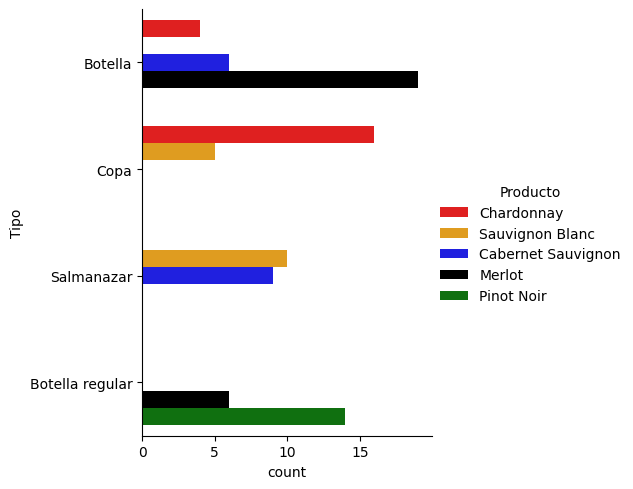

In [5]:
import seaborn as sns
# Specify colors for each values of the hue variable
palette = {
    'Chardonnay': 'Red',
    'Sauvignon Blanc': 'orange',
    'Cabernet Sauvignon': 'blue',
    'Merlot': 'black',
    'Pinot Noir ': 'green',
}

sns.catplot(
    data=wini, y="Tipo", hue="Producto", kind="count",
    palette=palette,
)

In [6]:
wini['density'].unique()

array([1.0010e+03, 9.9400e-01, 9.9510e-01, 9.9560e-01, 9.9490e-01,
       9.9380e-01, 9.9080e-01, 9.9470e-01, 9.9200e-01, 9.9120e-01,
       1.0002e+04, 9.9140e-01, 9.9280e-01, 9.8920e-01, 9.9170e-01,
       9.9550e-01, 9.9300e-01, 9.9370e-01, 9.9610e-01, 9.9060e-01,
       9.9740e-01, 9.9340e-01, 9.9390e-01, 9.9620e-01, 9.9050e-01,
       9.9990e-01, 9.9540e-01, 9.9310e-01, 9.9500e-01, 9.9100e-01,
       9.9110e-01, 9.9720e-01, 9.9260e-01, 9.9270e-01, 9.9030e-01,
       9.9580e-01, 9.9640e-01, 9.9410e-01, 9.8980e-01, 9.9290e-01,
       9.9850e-01, 9.9460e-01, 9.9660e-01, 9.9750e-01])

In [7]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
import pandas as pd

# Suponiendo que tenemos un dataframe llamado df con las columnas mencionadas
# Crear un dataframe de ejemplo con las columnas mencionadas
df = pd.DataFrame({
    'Tipo': ['A', 'B', 'A', 'C'],
    'Producto': ['X', 'Y', 'Z', 'X'],
    'fixed acidity': [7.4, 7.8, 7.4, 7.2],
    'volatile acidity': [0.7, 0.88, 0.76, 0.65],
    'citric acid': [0, 0.04, 0.02, 0.03],
    'residual sugar': [1.9, 2.6, 2.3, 1.8],
    'chlorides': [0.076, 0.098, 0.092, 0.075],
    'free sulfur dioxide': [11, 25, 14, 15],
    'total sulfur dioxide': [34, 67, 54, 59],
    'density': [0.9978, 0.9968, 0.9970, 0.9966],
    'pH': [3.51, 3.20, 3.26, 3.18]
})

# Definir el codificador ordinal para la columna 'Tipo'
ordinal_encoder = OrdinalEncoder()
df['Tipo_encoded'] = ordinal_encoder.fit_transform(df[['Tipo']])

# Definir el codificador categórico para la columna 'Producto'
onehot_encoder = OneHotEncoder()
df_encoded = onehot_encoder.fit_transform(df[['Producto']]).toarray()
# Crear un dataframe con las nuevas columnas categóricas
df_onehot = pd.DataFrame(df_encoded, columns=onehot_encoder.get_feature_names_out(['Producto']))

# Unir el dataframe original con las nuevas columnas categóricas
df_final = pd.concat([df, df_onehot], axis=1)

# Mostrar el dataframe final
print(df_final)


  Tipo Producto  fixed acidity  volatile acidity  citric acid  residual sugar  \
0    A        X            7.4              0.70         0.00             1.9   
1    B        Y            7.8              0.88         0.04             2.6   
2    A        Z            7.4              0.76         0.02             2.3   
3    C        X            7.2              0.65         0.03             1.8   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.076                   11                    34   0.9978  3.51   
1      0.098                   25                    67   0.9968  3.20   
2      0.092                   14                    54   0.9970  3.26   
3      0.075                   15                    59   0.9966  3.18   

   Tipo_encoded  Producto_X  Producto_Y  Producto_Z  
0           0.0         1.0         0.0         0.0  
1           1.0         0.0         1.0         0.0  
2           0.0         0.0         0.0         1.0  
3      

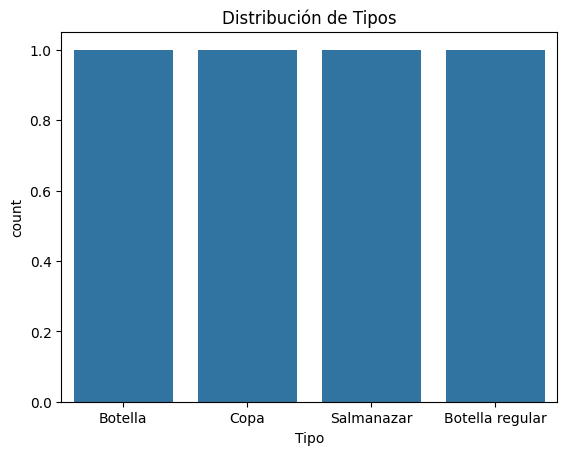

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.DataFrame({
    'Tipo': ['Botella', 'Copa', 'Salmanazar', 'Botella regular'],
    'Producto': ['X', 'Y', 'Z', 'X'],
    'fixed acidity': [7.4, 7.8, 7.4, 7.2],
    'volatile acidity': [0.7, 0.88, 0.76, 0.65],
    'citric acid': [0, 0.04, 0.02, 0.03],
    'residual sugar': [1.9, 2.6, 2.3, 1.8],
    'chlorides': [0.076, 0.098, 0.092, 0.075],
    'free sulfur dioxide': [11, 25, 14, 15],
    'total sulfur dioxide': [34, 67, 54, 59],
    'density': [0.9978, 0.9968, 0.9970, 0.9966],
    'pH': [3.51, 3.20, 3.26, 3.18]
})

# Graficar la columna 'Tipo'
sns.countplot(x='Tipo', data=df)
plt.title('Distribución de Tipos')
plt.show()


<ipython-input-9-30ec27a756aa>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


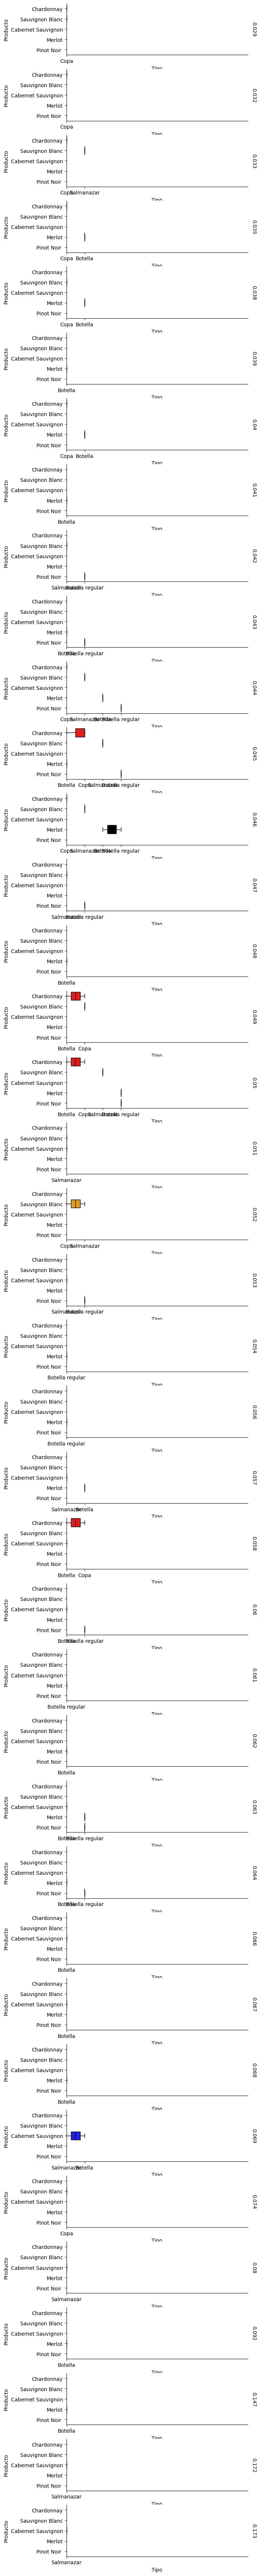

In [9]:

# Define el diccionario de colores personalizados
palette = {
    'Chardonnay': 'Red',
    'Sauvignon Blanc': 'orange',
    'Cabernet Sauvignon': 'blue',
    'Merlot': 'black',
    'Pinot Noir ': 'green',
}

# Crea el gráfico de caja
g = sns.catplot(
    data=wini,
    x="Tipo", y="Producto", row='chlorides',
    kind="box", orient="h",
    sharex=False, margin_titles=True,
    height=1.8, aspect=4, palette=palette,
)

# Define las etiquetas de los ejes
g.set(xlabel="Tipo", ylabel="Producto").set(xlim=(0,10))
g.set_titles(row_template="{row_name}")

# Muestra el gráfico
plt.show()


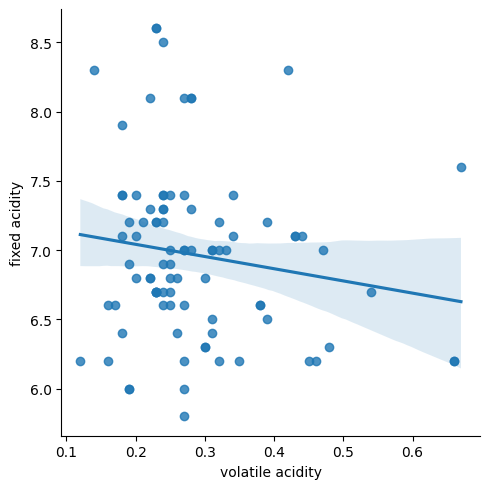

In [10]:

# Trama de línea de regresión
sns.lmplot(x="volatile acidity", y="fixed acidity", data=wini)

# Mostrar la gráfica
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


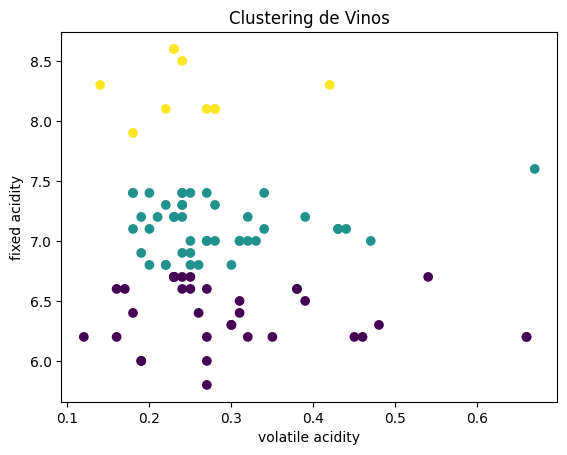

In [18]:
# prompt: del anterior ayudame cn el closstering

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Asumiendo que 'wini' es tu DataFrame y 'X' contiene las características que quieres usar para el clustering
X = wini[['volatile acidity', 'fixed acidity']]  # Reemplaza con las características que deseas usar

# Inicializa el modelo KMeans con el número de clusters que deseas
kmeans = KMeans(n_clusters=3)  # Reemplaza 3 con el número de clusters que deseas

# Ajusta el modelo a tus datos
kmeans.fit(X)

# Obtén las etiquetas de los clusters para cada punto de datos
labels = kmeans.labels_

# Agrega las etiquetas de los clusters al DataFrame original
wini['cluster'] = labels

# Visualiza los clusters (ejemplo usando un scatter plot)
plt.scatter(wini['volatile acidity'], wini['fixed acidity'], c=wini['cluster'])
plt.title('Clustering de Vinos')
plt.xlabel('volatile acidity')
plt.ylabel('fixed acidity')
plt.show()


<ipython-input-11-4af94f3ac5fa>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Tipo', data=wini, palette=palette)


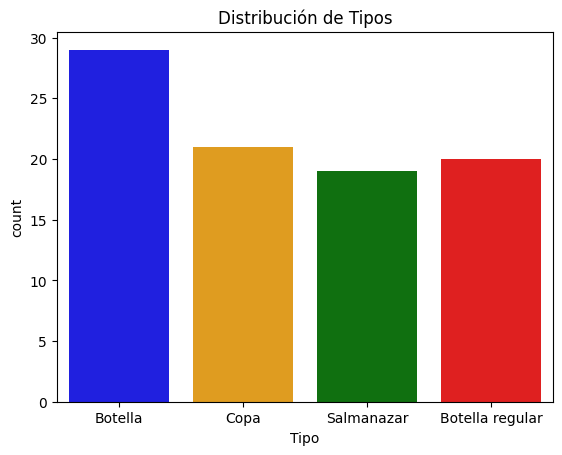

In [11]:


# Define el diccionario de colores para cada ítem de tipo
palette = {
    'Botella': 'blue',
    'Copa': 'orange',
    'Salmanazar': 'green',
    'Botella regular': 'red'
}

# Graficar la columna 'Tipo' con colores diferentes para cada ítem
sns.countplot(x='Tipo', data=wini, palette=palette)
plt.title('Distribución de Tipos')
plt.show()


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Suponiendo que 'wini' es tu DataFrame y tienes las características y la variable objetivo definidas
# Características (features)
X = wini[['volatile acidity', 'fixed acidity']]

# Variable objetivo (target)
y = wini['Tipo']  # Reemplaza 'target_column' con el nombre de tu variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el clasificador SVM
clf = SVC()

# Entrenar el modelo
clf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

# Mostrar el reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Precisión del modelo: 0.3333333333333333

Reporte de Clasificación:
                 precision    recall  f1-score   support

        Botella       0.33      1.00      0.50         6
Botella regular       0.00      0.00      0.00         3
           Copa       0.00      0.00      0.00         5
     Salmanazar       0.00      0.00      0.00         4

       accuracy                           0.33        18
      macro avg       0.08      0.25      0.12        18
   weighted avg       0.11      0.33      0.17        18



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


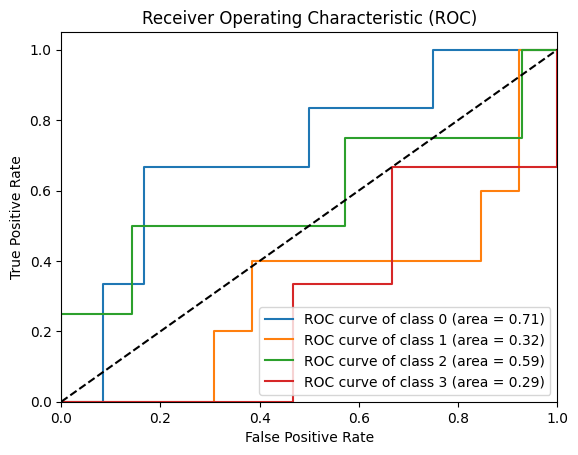

In [15]:

from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier


X = wini[['volatile acidity', 'fixed acidity']]

# Variable objetivo (target)
y = wini['Tipo']  # Reemplaza 'target_column' con el nombre de tu variable objetivo

# Binarizar la variable objetivo para poder calcular la curva ROC
y_bin = label_binarize(y, classes=wini['Tipo'].unique())
n_classes = y_bin.shape[1]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Inicializar el clasificador SVM para multi-clase usando OneVsRestClassifier
clf = OneVsRestClassifier(SVC(probability=True))

# Entrenar el modelo
clf.fit(X_train, y_train_bin)  # Entrenar para todas las clases

# Calcular las probabilidades de predicción para el conjunto de prueba
y_score = clf.predict_proba(X_test)

# Calcular la curva ROC y el AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar la curva ROC para cada clase
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

# Graficar la diagonal principal (línea de referencia)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()